In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ignores warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Import Dataset**

In [ ]:
#Import Dataset
from google.colab import drive
drive.mount('/content/drive')

dataset = '/content/drive/MyDrive/PORTOFOLIO/Mini Project 4/Clicked Ads Dataset.csv'
# Baca data CSV menggunakan pandas
df = pd.read_csv(dataset)
df.drop(columns=['Unnamed: 0'],inplace=True)
#df = pd.read_csv(source)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


#**Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [ ]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category'],
      dtype='object')

In [ ]:
nums = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
cats = ['Male', 'Timestamp', 'Clicked on Ad', 'city','province', 'category']

In [ ]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


**Observasi :**

- Feature Daily Time Spent on Site distribusinya skewed
- Feature Age distribusinya tampak mendekati normal
- Feature Area Income distribusinya terlihat skewed
- Feature Daily Internet Usage distribusinya terlihat mendekati normal

In [ ]:
df[cats].describe().transpose()

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


**Observasi:**

- Feature Male didominasi oleh label perempuan, yaitu sebanyak 518 dari 997
- Feature Timestamp tipe datanya dapat diubah dari object menjadi datetime untuk mempermudah analisis
- Feature Clicked on Ad memiliki jumlah yang seimbang antara label No dengan label Yes
- Feature city didominasi oleh Surabaya
- Feature province didominasi oleh Daerah Khusus Ibukota Jakarta
- Feature category didominasi oleh Otomotif

In [ ]:
for i in cats :
  print('---'*10)
  print(i)
  print(df[i].value_counts())

------------------------------
Male
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64
------------------------------
Timestamp
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64
------------------------------
Clicked on Ad
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
------------------------------
city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               

#Feature Engineering

In [ ]:
#Feature Timestamp

#check dtype
df.Timestamp.dtype

dtype('O')

In [ ]:
import datetime
df.Timestamp = pd.to_datetime(df.Timestamp)

In [ ]:
df['month']=df.Timestamp.dt.month
df.month.unique()

array([3, 4, 1, 6, 5, 7, 2])

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,month
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,4
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,3
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,1
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,6


#Univariate Analysis

##Numerical Features

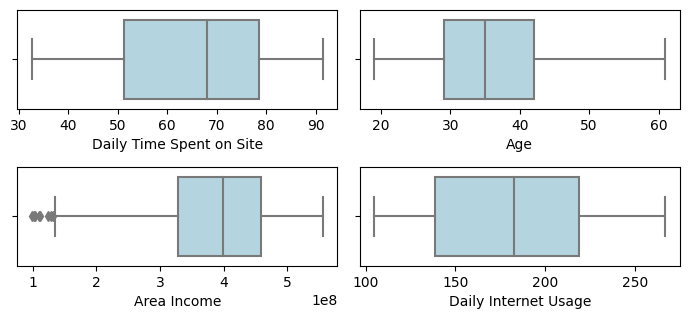

In [ ]:
plt.figure(figsize=(7,6))
for i in range(0, len(nums)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[nums[i]], color='lightblue')
    plt.xlabel(nums[i])
    plt.tight_layout()

**Insight :**

- Outliers hanya ada pada feature Area Income
- Feature Daily Time Spent on Site, Age, dan Area Income distribusinya sedikit skewed
- Feature Daily Internet Usage distribusinya mendekati normal

In [ ]:
nums2 = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']

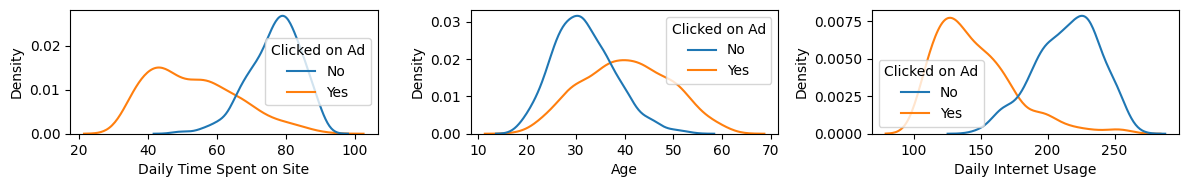

In [ ]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums2)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[nums2[i]],hue=df['Clicked on Ad'])
    plt.xlabel(nums2[i])
    plt.tight_layout()

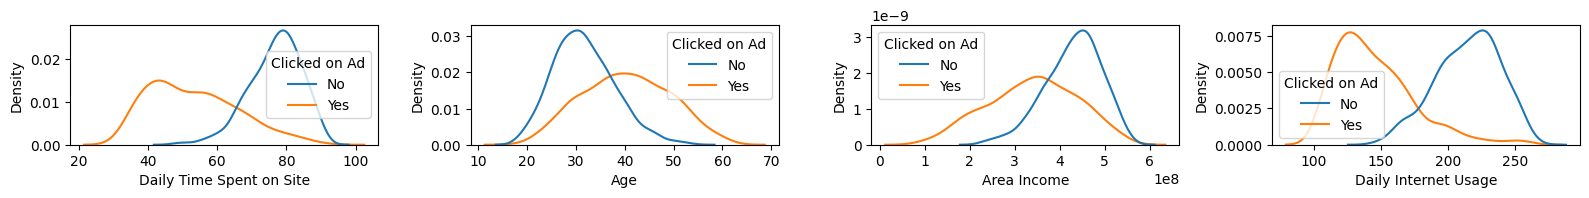

In [ ]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[nums[i]],hue=df['Clicked on Ad'])
    plt.xlabel(nums[i])
    plt.tight_layout()

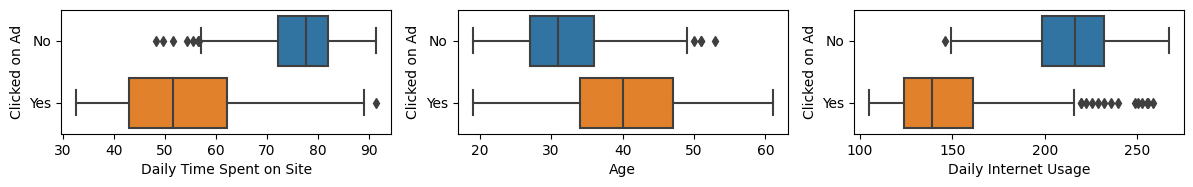

In [ ]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums2)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[nums2[i]],y=df['Clicked on Ad'])
    plt.xlabel(nums2[i])
    plt.tight_layout()

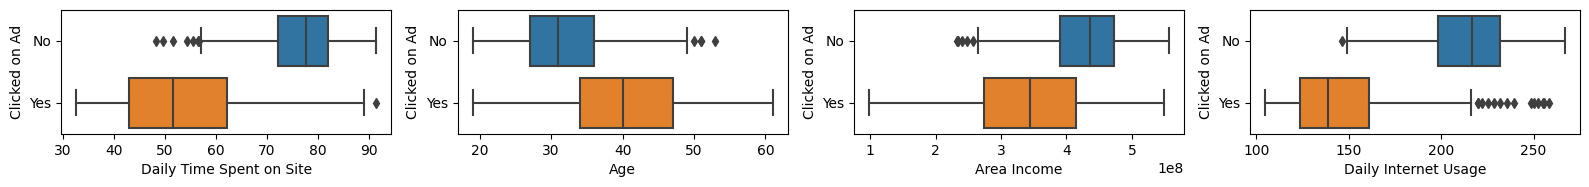

In [ ]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[nums[i]],y=df['Clicked on Ad'])
    plt.xlabel(nums[i])
    plt.tight_layout()

**Insight :**

- Pengguna yang mengklik Ads adalah pengguna dengan Daily Time Spend on Site sekitar 40-45 menit. Sedangkan, pengguna yang tidak mengklik Ads adalah pengguna dengan Daily Time Spend on Site sekitar 75-80 menit.
- Pengguna yang mengklik Ads rata-rata ada pada usia(Age) 40 tahun. Sedangkan, pengguna yang tidak mengklik Ads sebagian besar ada pada usia(Age) 30 tahun.
- Pengguna dengan Daily Internet Usage sekitar 100-150 cenderung mengklik Ads. Sedangkan, pengguna dengan Daily Internet Usage sekitar 200-250 cenderung tidak mengklik Ads.
- Pengguna dengan Area Income yang lebih rendah cenderung mengklik Ads. sedangkan, pengguna dengan area income yang lebih besar cenderung tidak mengklik Ads.

##**Categorical Features**

Feature Timestamp diganti dengan feature month agar lebih representatif

In [ ]:
cats2 = ['Male','month','Clicked on Ad','city', 'province', 'category']

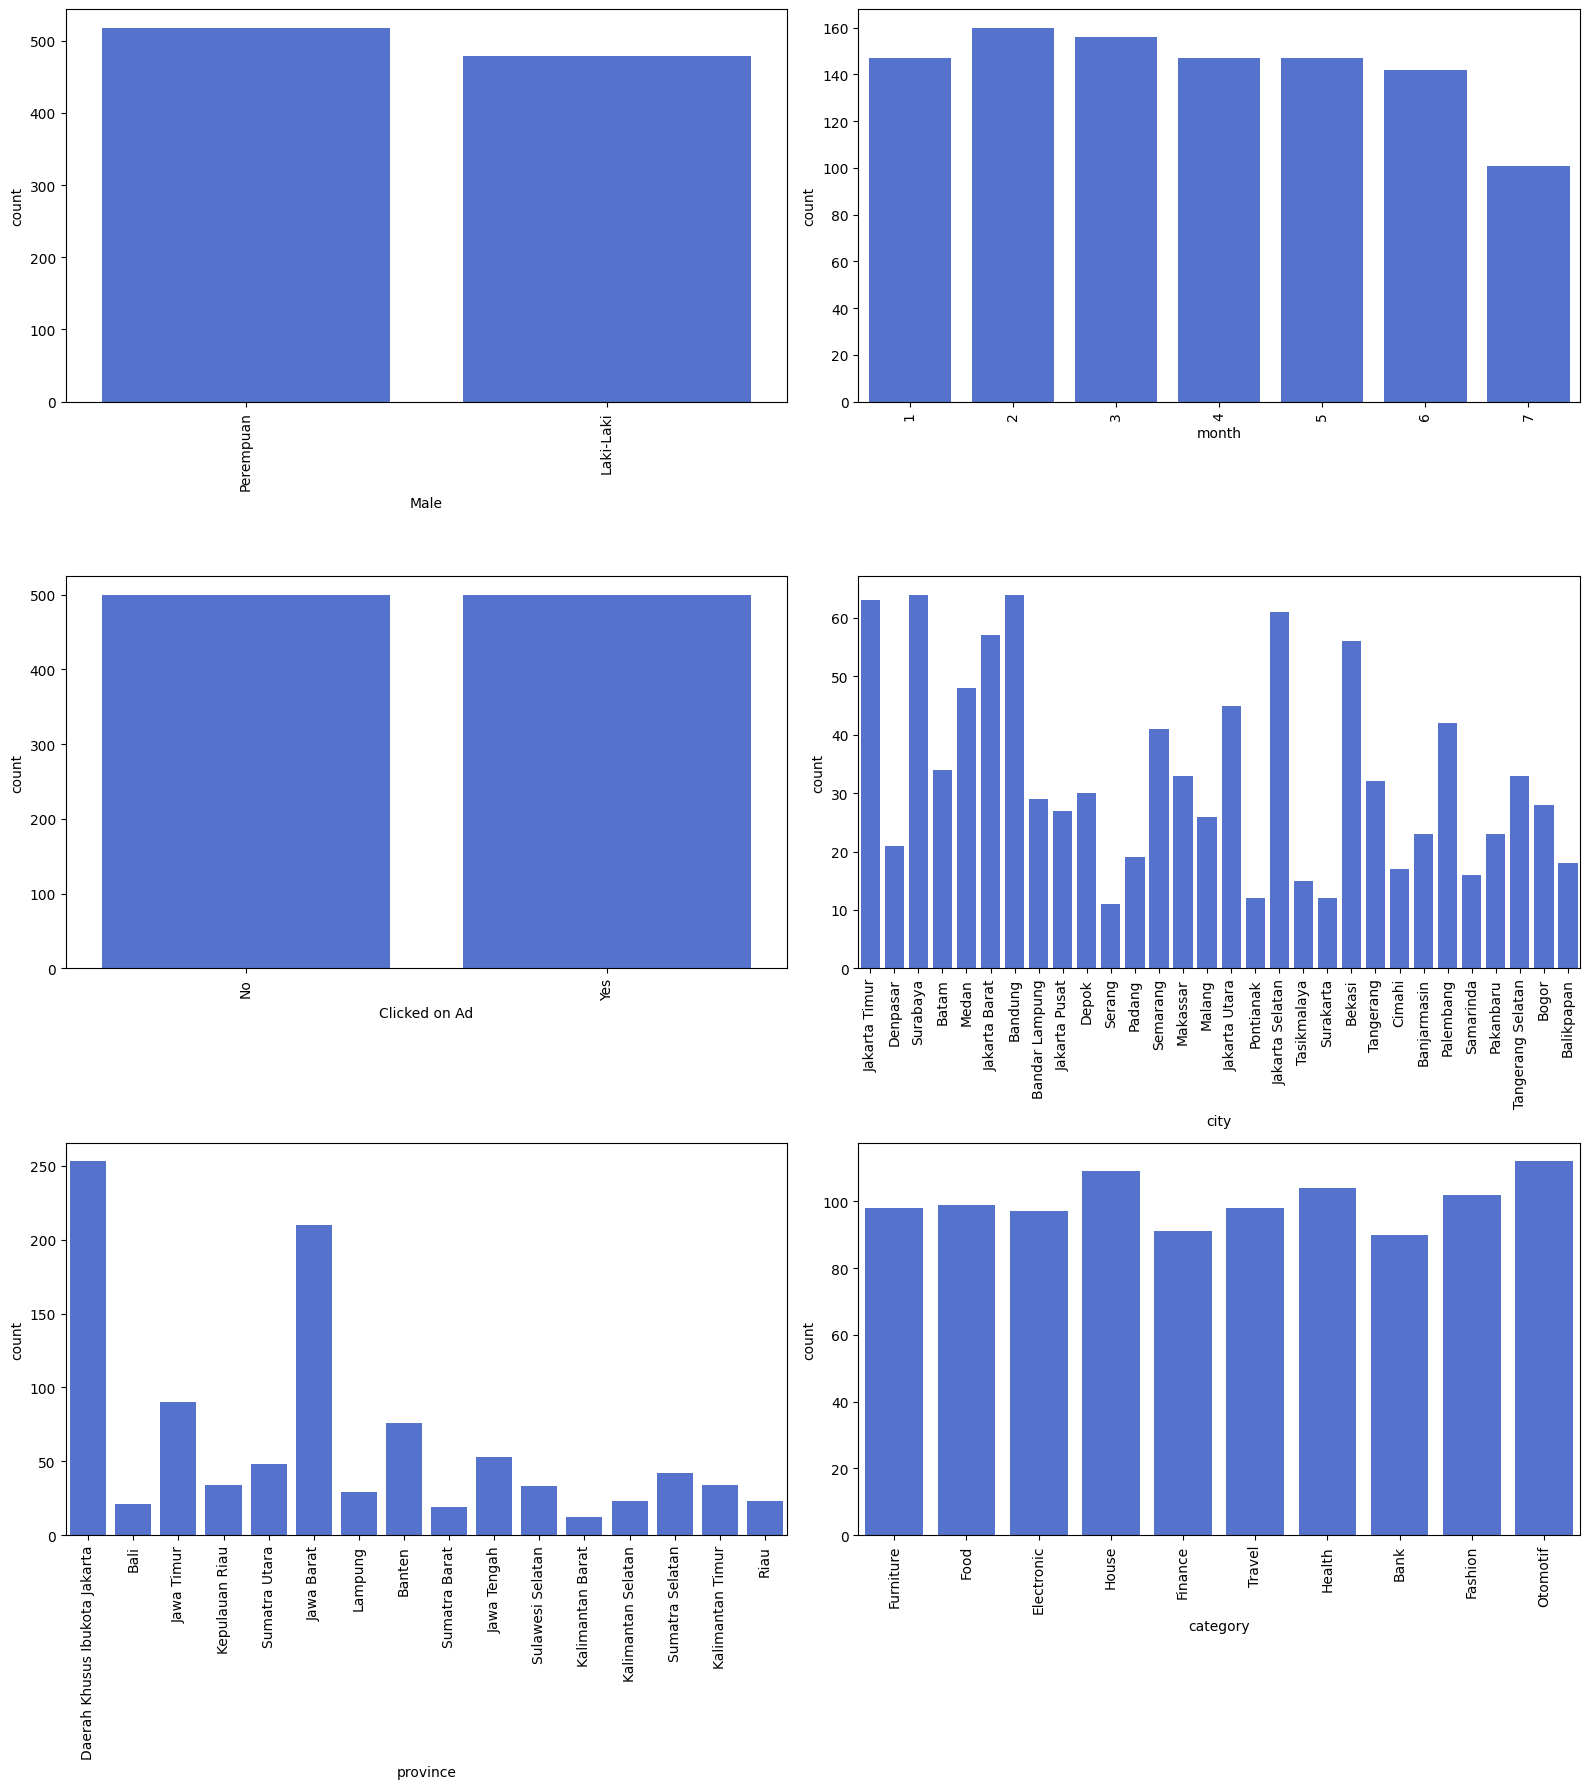

In [ ]:
plt.figure(figsize=(16,18))
for i in range(0, len(cats2)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cats2[i]],color='royalblue')
    plt.xlabel(cats2[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

**Insight :**

- Label Perempuan dan Laki-Laki pada feature Male tidak terlalu timpang
- Label Yes dan No pada feature Clicked on Ad balance
- Feature province didominasi oleh 2 nilai

#Bivariate Analysis

##Numerical Features
Except Area Income

<Figure size 800x800 with 0 Axes>

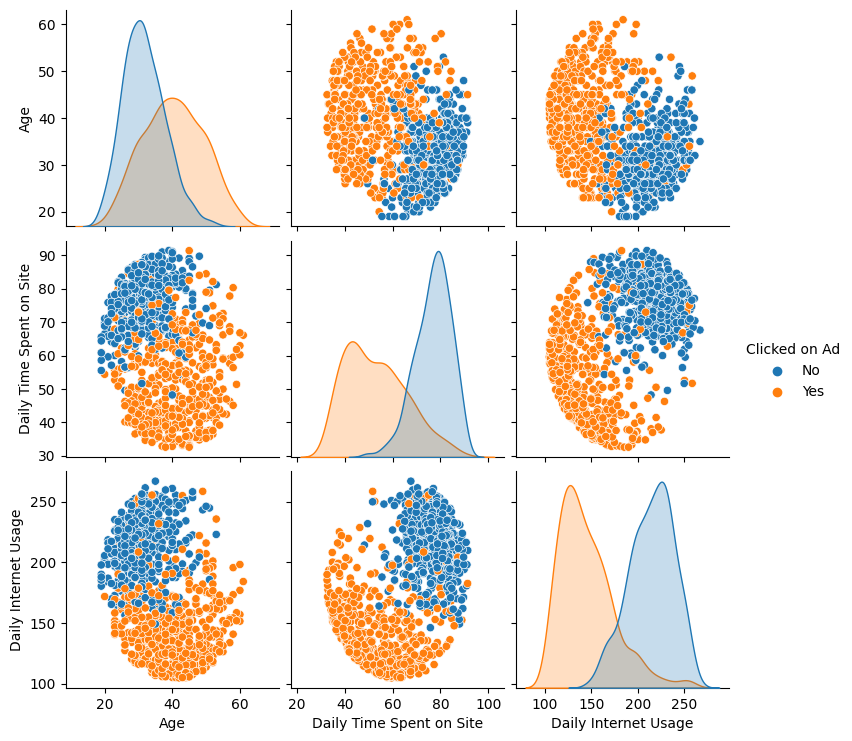

In [ ]:
plt.figure(figsize=(8, 8))
sns.pairplot(df[['Age','Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']], diag_kind='kde',hue='Clicked on Ad')
plt.show()

**Insight :**

- Semakin tua usia (Age) pengguna serta semakin sedikit Daily Internet Usage dan Daily Time Spent on Site maka seorang pengguna cenderung mengklik Ads.
- Semakin sedikit Daily Internet Usage dan Daily Time Spent on Site maka seorang pengguna cenderung mengklik Ads.

##Categorical Features

In [ ]:
cats3 = ['Male','month', 'city', 'province', 'category']

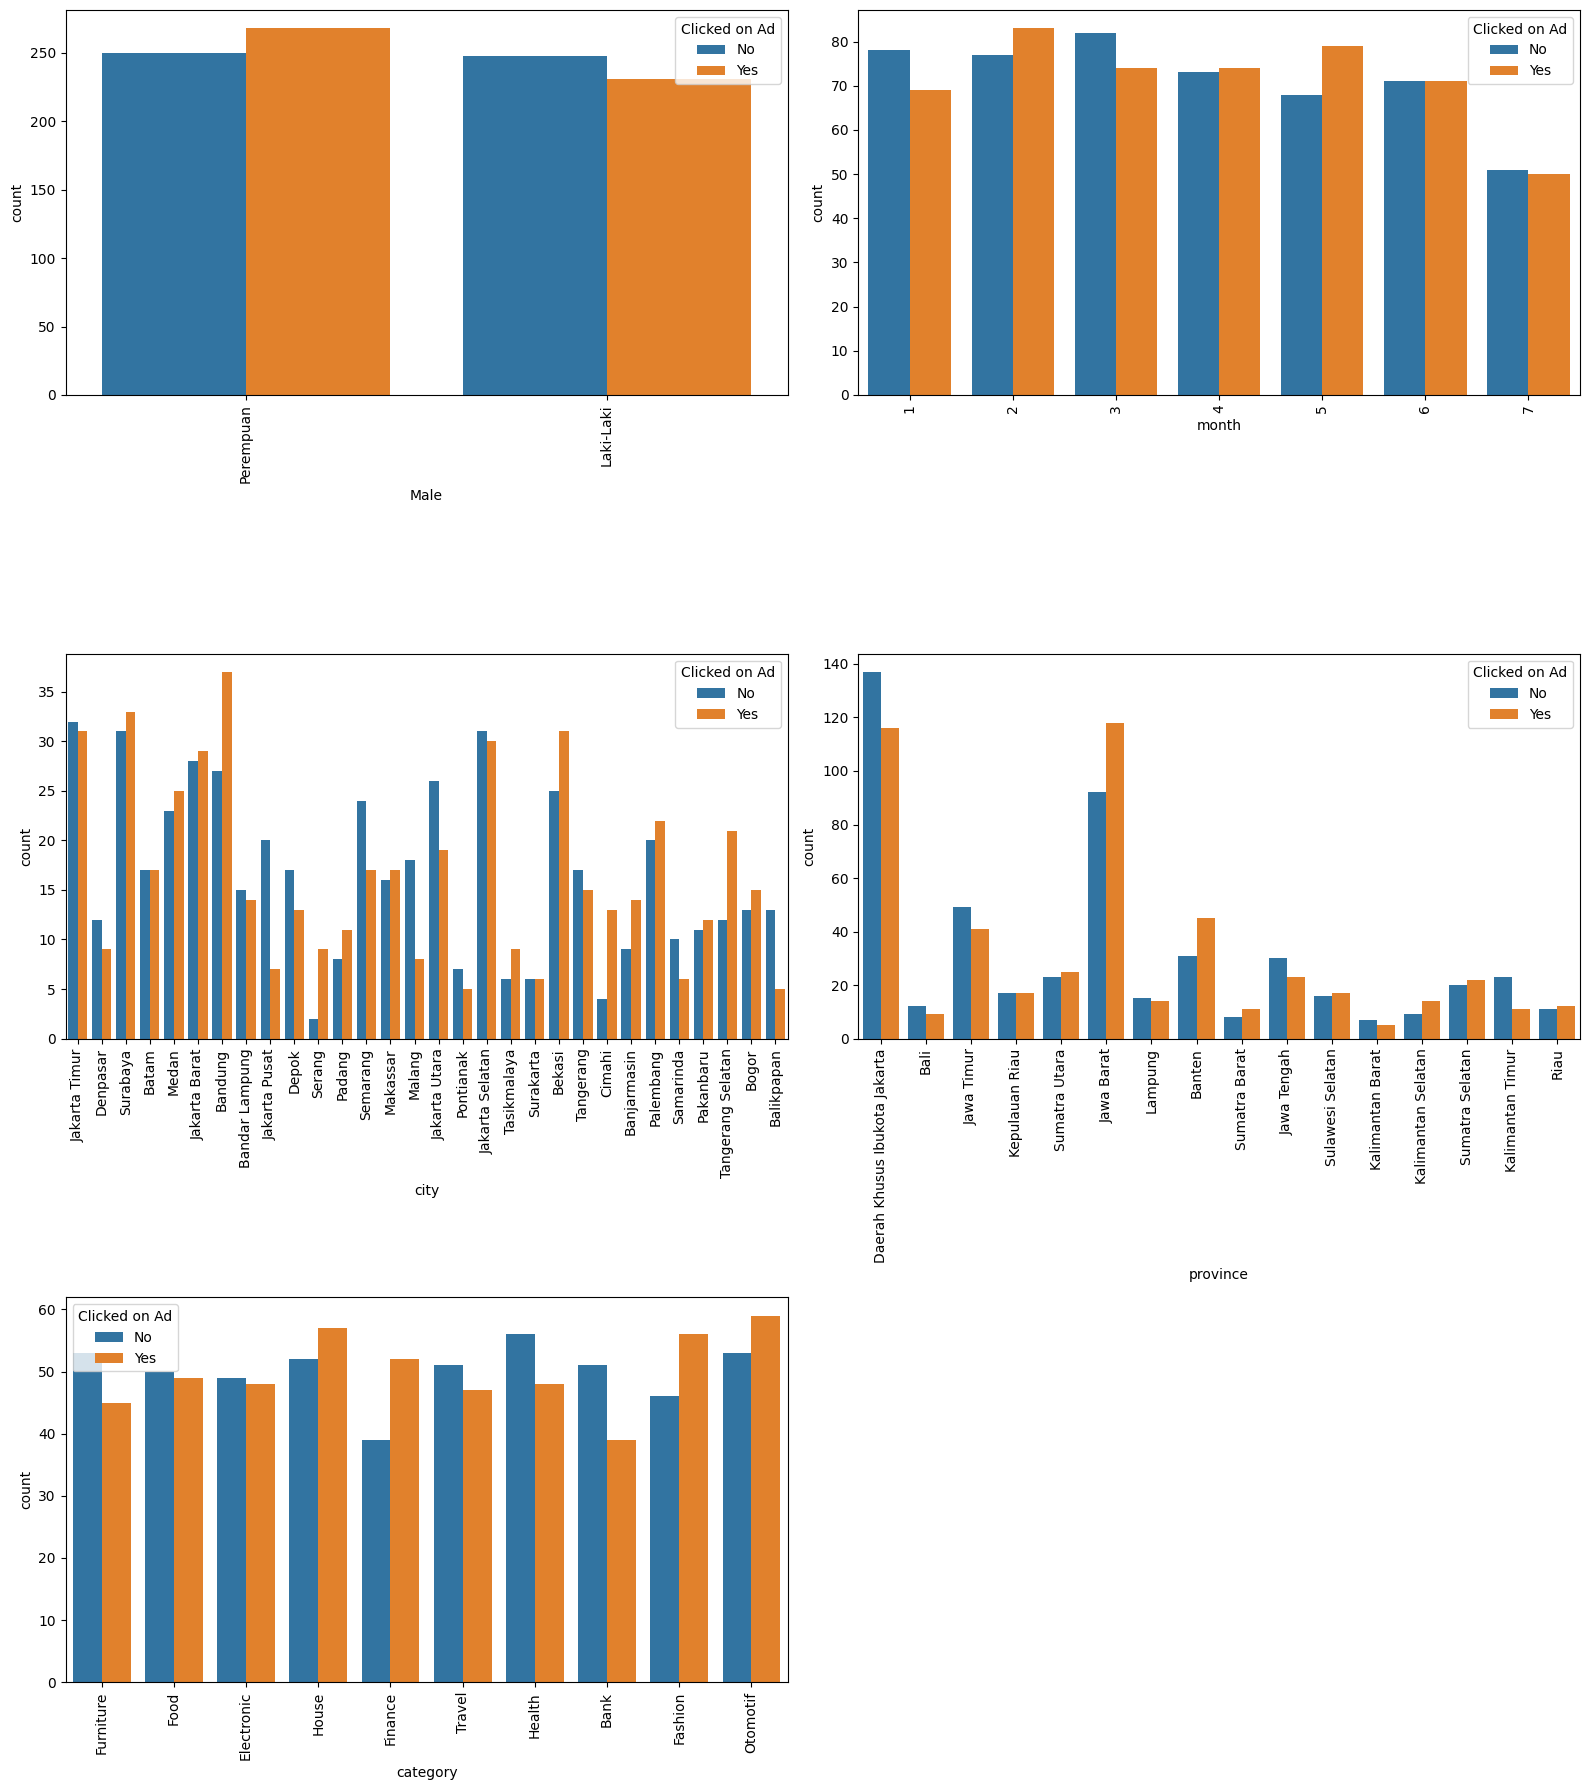

In [ ]:
plt.figure(figsize=(16,18))
for i in range(0, len(cats3)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cats3[i]], hue=df['Clicked on Ad'])
    plt.xlabel(cats3[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

**Insight:**

- Pada feature Male, pengguna perempuan lebih banyak mengklik Ads dibandingkan dengan user laki-laki
- Setiap bulannya, perbandingan jumlah antara pengguna yang mengklik/tidak Ads hampir sebanding. Perbedaaan yang cukup signifikan terdapat pada bulan ke 12, dimana jumlah pengguna yang mengklik Ads 2 kali lebih banyak dibandingkan yang tidak mengklik Ads.
- 13 dari 30 kota yang ada pada feature city, Jumlah pengguna yang mengklik Ad lebih banyak dibandingkan dengan yang tidak mengklik Ads.
- Pada feature province, pengguna yang berasal dari Jawa Barat mengklik Ads lebih banyak dibandingkan dengan yang tidak mengklik Ads.
- Pada feature category, pengguna lebih banyak mengklik Ads dengan category House, Finance, Fashion dan Otomotif jika dibandingkan dengan pengguna yang tidak mengklik Ads.

#Multivariate Analysis

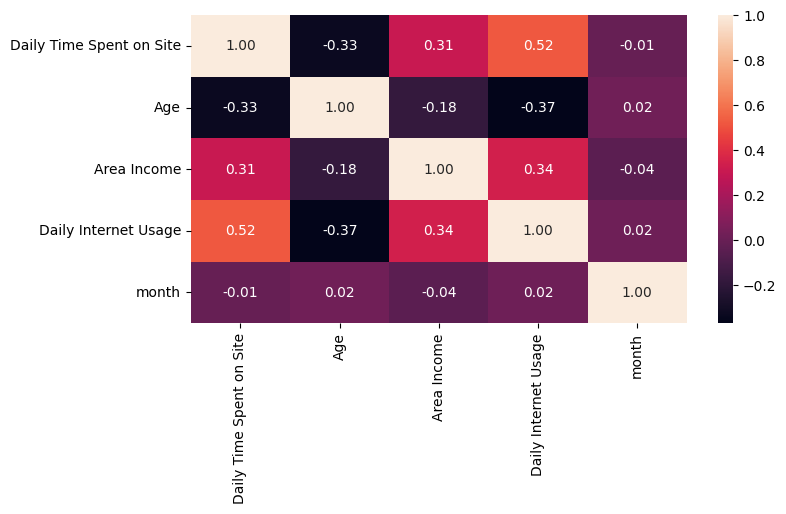

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

**Insight :**

- Feature Daily Time Spent on Site berkorelasi positif cukup kuat dengan Daily Internet Usage
- Feature Age berkorelasi negatif lemah dengan feature Daily Time Spent on Site, Area Income, dan Daily Internet Usage
- Feature Area Income berkorelasi positif dengan feature Daily Time Spent on Site dan Daily Internet Usage dan berkorelasi negatif dengan feature Age

#**Preprocessing Data**

In [ ]:
df1 = df.copy()

In [ ]:
df1.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'month'],
      dtype='object')

In [ ]:
nums = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
cats = ['Male', 'Timestamp', 'Clicked on Ad', 'city','province', 'category']

##Check Missing Values

In [ ]:
df1.shape

(1000, 11)

In [ ]:
df1.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
month                        0
dtype: int64

In [ ]:
#persentase null values
persentase = round(df1.isnull().sum()*100/df1.shape[0],3)
persentase

Daily Time Spent on Site    1.3
Age                         0.0
Area Income                 1.3
Daily Internet Usage        1.1
Male                        0.3
Timestamp                   0.0
Clicked on Ad               0.0
city                        0.0
province                    0.0
category                    0.0
month                       0.0
dtype: float64

In [ ]:
df1.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,month
count,987.000000,1000.000000,9.870000e+02,989.000000,1000.000000
mean,64.929524,36.009000,3.848647e+08,179.863620,3.817000
std,15.844699,8.785562,9.407999e+07,43.870142,1.926973
min,32.600000,19.000000,9.797550e+07,104.780000,1.000000
25%,51.270000,29.000000,3.286330e+08,138.710000,2.000000
50%,68.110000,35.000000,3.990683e+08,182.650000,4.000000
75%,78.460000,42.000000,4.583554e+08,218.790000,5.000000
max,91.430000,61.000000,5.563936e+08,267.010000,7.000000


In [ ]:
df1[cats].describe().transpose()

,count,unique,top,freq,first,last
Male,997,2,Perempuan,518,NaT,NaT
Timestamp,1000,997,2016-05-26 15:40:00,2,2016-01-01 02:52:00,2016-07-24 00:22:00
Clicked on Ad,1000,2,No,500,NaT,NaT
city,1000,30,Surabaya,64,NaT,NaT
province,1000,16,Daerah Khusus Ibukota Jakarta,253,NaT,NaT
category,1000,10,Otomotif,112,NaT,NaT


- Pada feature numerik nilai yang kosong diisi dengan nilai median dari masing-masing feature. Penggunaan nilai median sebagai nilai yang diinputkan untuk nilai yang kosong karena distribusi data cenderung skewed.
- Pada feature kategorik nilai kosong diisi dengan modus dari feature tersebut.

In [ ]:
# imputation median to null values for numerical feature
df1.fillna(df1.median(),inplace=True)

#imputation mode for categorical feature
df1['Male'].fillna('Perempuan',inplace=True)

#recheck null values
df1.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
month                       0
dtype: int64

##Check Duplicated Data

In [ ]:
df1.duplicated().sum()

0

- Dataset tidak memiliki nilai yang duplikat

#Feature Engineering :
###**1. Feature Timestamp**

Lakukan ekstraksi pada kolom yang berhubungan dengan waktu (Hint: Buatlah kolom baru untuk mengekstraksi data waktu menjadi tahun, bulan, pekan, dan hari.)

In [ ]:
import datetime
df1.Timestamp = pd.to_datetime(df1.Timestamp)
df1.Timestamp.dtype

dtype('<M8[ns]')

In [ ]:
df1['year']=df1.Timestamp.dt.year
df1['month']=df1.Timestamp.dt.month
df1['week']=df1.Timestamp.dt.isocalendar().week
df1['day']=df1.Timestamp.dt.day

In [ ]:
#ubah tipe data feature week
df1.week = df1.week.astype('int64')

In [ ]:
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,month,year,week,day
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,2016,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,4,2016,14,4
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,3,2016,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,1,2016,1,10
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,6,2016,22,3


###**2. Feature Province**

In [ ]:
df1.replace('Daerah Khusus Ibukota Jakarta','DKI Jakarta',inplace=True)

#Feature Encoding

###**Label Encoding**

In [ ]:
#mengubah label Laki-Laki menjadi 1 dan label perempuan menjadi 0
df1['Male'] = np.where(df1['Male']=='Laki-Laki',1,0)

#check label
df1.Male.unique()

array([0, 1])

In [ ]:
df1['Clicked on Ad'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#mengubah label Yes menjadi 1 dan label No menjadi 0
df1['Clicked on Ad'] = np.where(df1['Clicked on Ad']=='Yes',1,0)

#check label
df1['Clicked on Ad'].unique()

array([0, 1])

###**One Hot Encoding (OHE)**
Candidate OHE: city, province, category

In [ ]:
df1.city.unique()

array(['Jakarta Timur', 'Denpasar', 'Surabaya', 'Batam', 'Medan',
       'Jakarta Barat', 'Bandung', 'Bandar Lampung', 'Jakarta Pusat',
       'Depok', 'Serang', 'Padang', 'Semarang', 'Makassar', 'Malang',
       'Jakarta Utara', 'Pontianak', 'Jakarta Selatan', 'Tasikmalaya',
       'Surakarta', 'Bekasi', 'Tangerang', 'Cimahi', 'Banjarmasin',
       'Palembang', 'Samarinda', 'Pakanbaru', 'Tangerang Selatan',
       'Bogor', 'Balikpapan'], dtype=object)

In [ ]:
df1.province.unique()

array(['DKI Jakarta', 'Bali', 'Jawa Timur', 'Kepulauan Riau',
       'Sumatra Utara', 'Jawa Barat', 'Lampung', 'Banten',
       'Sumatra Barat', 'Jawa Tengah', 'Sulawesi Selatan',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Sumatra Selatan',
       'Kalimantan Timur', 'Riau'], dtype=object)

Melakukan OHE pada feature category

In [ ]:
ohe = ['province','category']

In [ ]:
for cat in ohe :
  onehots = pd.get_dummies(df1[cat], prefix=cat)
  df1 = df1.join(onehots)

In [ ]:
df1.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'month', 'year', 'week', 'day', 'province_Bali',
       'province_Banten', 'province_DKI Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Selatan',
       'province_Kalimantan Timur', 'province_Kepulauan Riau',
       'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',
       'province_Sumatra Barat', 'province_Sumatra Selatan',
       'province_Sumatra Utara', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel'],
      dtype='object')

In [ ]:
#df_encode.drop(columns=to_ohe,inplace=True)

#Split Feature and Target

In [ ]:
dfs = df1.copy()

- drop feature Timestamp karena sudah dipecah menjadi 3 feature baru.
- drop feature year karena hanya ada 1 nilai unik
- drop feature day karena terlalu banyak nilai unik

In [ ]:
dfs.drop(columns=['Timestamp','year','day'],inplace=True)

In [ ]:
dfs.shape

(1000, 37)

In [ ]:
dfs.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'city', 'province',
       'category', 'month', 'week', 'province_Bali', 'province_Banten',
       'province_DKI Jakarta', 'province_Jawa Barat', 'province_Jawa Tengah',
       'province_Jawa Timur', 'province_Kalimantan Barat',
       'province_Kalimantan Selatan', 'province_Kalimantan Timur',
       'province_Kepulauan Riau', 'province_Lampung', 'province_Riau',
       'province_Sulawesi Selatan', 'province_Sumatra Barat',
       'province_Sumatra Selatan', 'province_Sumatra Utara', 'category_Bank',
       'category_Electronic', 'category_Fashion', 'category_Finance',
       'category_Food', 'category_Furniture', 'category_Health',
       'category_House', 'category_Otomotif', 'category_Travel'],
      dtype='object')

In [ ]:
# Split features vs target
X = dfs[[col for col in dfs.columns if (str(dfs[col].dtype) != 'object') and col not in ['Clicked on Ad']]]
y = dfs['Clicked on Ad'].values
print(X.shape)
print(y.shape)

(1000, 33)
(1000,)


In [ ]:
X.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'month', 'week', 'province_Bali',
       'province_Banten', 'province_DKI Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Selatan',
       'province_Kalimantan Timur', 'province_Kepulauan Riau',
       'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',
       'province_Sumatra Barat', 'province_Sumatra Selatan',
       'province_Sumatra Utara', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel'],
      dtype='object')

#Split Data Into Train set and Test set



In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y,random_state = 123)

In [ ]:
print('Dimensi Train:',X_train.shape)
print('Dimensi Test:',X_test.shape)

Dimensi Train: (700, 33)
Dimensi Test: (300, 33)


#Data Modeling

In [ ]:
!pip install ppscore

In [ ]:
from datetime import datetime as dt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from collections import defaultdict
import ppscore as pps

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
## UDF for experimenting several classification models
def experiment(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)

    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()

    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad)
                 ]

    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)

        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)

    return result

In [ ]:
result = experiment(X_train,X_test,y_train,y_test)
result = pd.DataFrame(result)

In [ ]:
result

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.696667,0.640000,0.721805,0.003520
1,Logistic Regression,LogisticRegression(),0.500000,0.000000,0.000000,0.006829
2,Decision Tree,DecisionTreeClassifier(),0.940000,0.926667,0.952055,0.007458
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.946667,0.920000,0.971831,0.264041
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.933333,0.913333,0.951389,0.216171


Berdasarkan proses pemodelan, model dengan skor akurasi tertinggi adalah Decision tree, Random forest dan Gradient boosting. Namun jika dilihat dari durasinya, decision tree merupakan model dengan durasi waktu paling rendah. Ini adalah hasil pemodelan tanpa menangani normalisasi data dan skor ini dapat ditingkatkan lebih lanjut melalui penerapan normalisasi pada kumpulan data.

#Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [ ]:
result2 = experiment(X_train_minmax,X_test_minmax,y_train,y_test)
result2 = pd.DataFrame(result2)

In [ ]:
result2

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.786667,0.740000,0.816176,0.002487
1,Logistic Regression,LogisticRegression(),0.936667,0.900000,0.971223,0.009804
2,Decision Tree,DecisionTreeClassifier(),0.936667,0.926667,0.945578,0.004901
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.950000,0.933333,0.965517,0.241059
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.930000,0.913333,0.944828,0.215718


Setelah dilakukan normalisasi data, terdapat beberapa perubahan pada hasil model. Akurasinya mengalami peningkatan untuk semua model khususnya pada KNN dan Logistic Regression yang mengalami peningkatan signifikan dibandingkan hasil sebelumnya. Hal ini membuktikan bahwa menangani normalisasi data dapat meningkatkan performa model termasuk skor accuracy, recall, dan precision.

Tujuan model kami adalah memprediksi jumlah maksimum calon pelanggan yang mengklik iklan. Oleh karena itu kita harus meminimalisir False Positive dimana pelanggan yang tidak mengklik iklan diprediksi akan salah mengklik iklan. Hal ini akan menyebabkan terjadinya retargeting pasar yang salah dan berpotensi menimbulkan kerugian karena kita telah mengeluarkan biaya pemasaran pada target yang salah.

Oleh karena itu kita harus mengoptimalkan skor precision dengan tetap mempertimbangkan metriks lain agar skornya maksimal.

Terakhir, model random forest dipilih dengan mempertimbangkan skor precision dan accuracy yang tinggi.

#**Evaluation**
Model chosen in data modeling is random forest

##Confusion Matrix

In [ ]:
final_model_lr = result2['model'][3]
y_pred_lr = final_model_lr.predict(X_test_minmax)

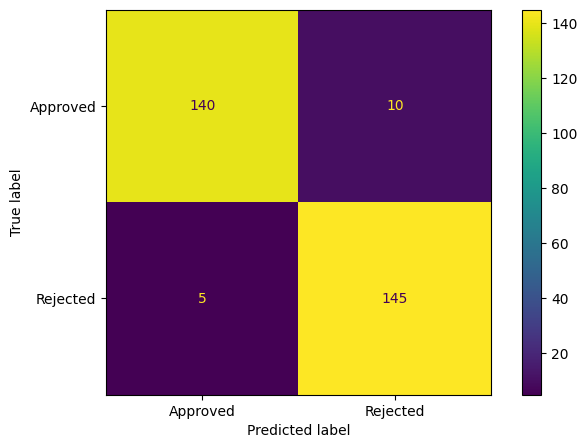

In [ ]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

def custom_confusion_matrix(y_true, y_pred, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax)

custom_confusion_matrix(
  y_test, y_pred_lr,
  display_labels=["Approved", "Rejected"]
)

Catatan =

- True Positive = jumlah observasi dimana model memperkirakan pelanggan akan mengklik iklan '1', dan mereka benar-benar mengklik iklan '1' (140)
- False Negative = jumlah observasi dimana model memperkirakan pelanggan tidak akan mengklik iklan '0', namun mereka benar-benar mengklik iklan '1' (10)
- False Positive = jumlah observasi dimana model memperkirakan pelanggan akan mengklik iklan '1', namun sebenarnya mereka tidak mengklik iklan '0' (5)
- True Negative = jumlah observasi dimana model memperkirakan pelanggan tidak akan mengklik iklan '0', dan mereka sebenarnya tidak mengklik iklan '0' (145)
- Tujuan model kami adalah memprediksi jumlah maksimum calon pelanggan yang mengklik iklan. Oleh karena itu kita harus meminimalisir False Positive dimana pelanggan yang tidak mengklik iklan diprediksi akan salah mengklik iklan. Hal ini akan menyebabkan terjadinya retargeting pasar yang salah dan berpotensi menimbulkan kerugian karena kita telah mengeluarkan biaya pemasaran pada target yang salah.

Berdasarkan confusion metrix, model kami telah menghasilkan hasil yang luar biasa dimana jumlah False Positif (Iklan yang diprediksi diklik, namun sebenarnya tidak) telah diminimalkan secara optimal pada tingkat 3%. Hal ini menghasilkan skor True Positive yang tinggi (Prediksi iklan yang diklik dan benar-benar diklik) sebesar 46,5% yang menghasilkan potensi keuntungan lebih tinggi.

##Feature Importance

In [ ]:
feature_imp = {}

feature_imp['columns'] = X_train.columns
feature_imp['feature_imp'] = result2['model'][3].feature_importances_

In [ ]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'],ascending=False).head(20)

<Axes: xlabel='feature_imp', ylabel='columns'>

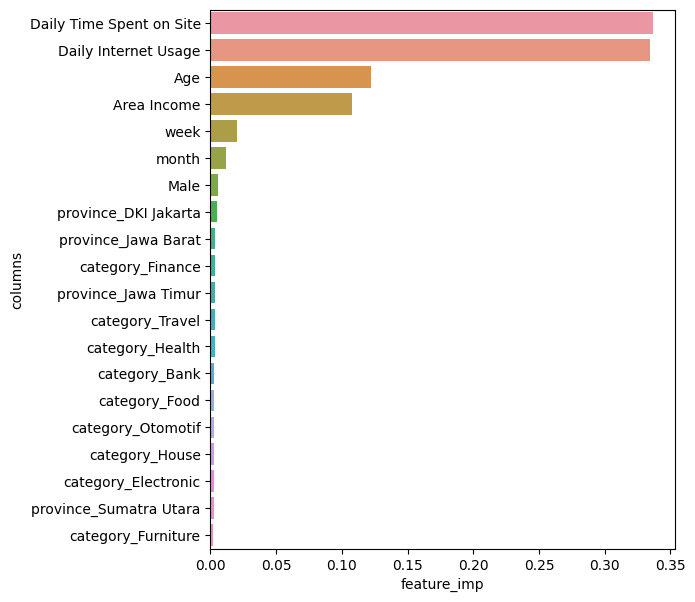

In [ ]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_feature_imp['feature_imp'],y=df_feature_imp['columns'])

Berdasarkan grafik tingkat kepentingan fitur di atas terlihat ada 4 fitur yang memiliki korelasi tinggi dalam membangun model, yaitu :

- 'Penggunaan Internet Sehari-hari'
- 'Waktu Sehari-hari yang Dihabiskan di Situs'
- 'Usia'
- 'Pendapatan Daerah'

Fitur dengan korelasi tertinggi dalam memprediksi iklan yang diklik pelanggan adalah Penggunaan Internet Harian dan Waktu yang Dihabiskan di Situs setiap hari. Hal ini dibuktikan berdasarkan analisis EDA sebelumnya bahwa pelanggan dengan penggunaan internet harian yang lebih rendah dan waktu yang dihabiskan di situs memiliki potensi mengklik iklan yang lebih tinggi.

Ciri-ciri lain yang juga mempunyai tingkat kepentingan yang tinggi adalah umur dan pendapatan daerah. Hal ini didukung dengan pemetaan sebaran pelanggan berdasarkan usia dan pendapatan daerah menunjukkan bahwa pelanggan yang memiliki usia lebih muda dan pendapatan lebih tinggi memiliki potensi mengklik iklan yang rendah.

#**Insight**
Berdasarkan analisis EDA dan Feature Importance dapat disimpulkan bahwa :

- Pengguna yang mengklik Ads adalah pengguna dengan Daily Time Spend on Site sekitar 40-45 menit. Sedangkan, pengguna yang tidak mengklik Ads adalah pengguna dengan Daily Time Spend on Site sekitar 75-80 menit.
- Pengguna yang mengklik Ads rata-rata ada pada usia 40 tahun, sedangkan pengguna yang tidak mengklik Ads sebagian besar ada pada usia (Age) 30 tahun.
- Pengguna dengan Daily Internet Usage sekitar 100-150 cenderung mengklik Ads. Sedangkan, pengguna dengan Daily Internet Usage sekitar 200-250 cenderung tidak mengklik Ads.
- Semakin tua usia (Age) serta semakin sedikit Daily Internet  Usage dan Daily Time Spent on Site maka seorang pengguna cenderung mengklik Ads.
- Semakin sedikit Daily Internet Usage dan Daily Time Spent on Site maka seorang pengguna cenderung mengklik Ads.
- Ciri-ciri lain yang juga mempunyai feature important yang tinggi adalah umur dan pendapatan daerah. Pelanggan yang memiliki usia lebih muda dan pendapatan lebih tinggi memiliki potensi mengklik iklan yang lebih sedikit.

#**Rekomendasi Bisnis**:

**1. Personalisasi Iklan Berdasarkan Waktu yang Dihabiskan di Situs (Daily Time Spend on Site):**
- Untuk pengguna dengan Daily Time Spend on Site sekitar 40-45 menit, kami dapat mengoptimalkan iklan agar lebih menarik bagi mereka. Mungkin kami bisa menargetkan iklan yang lebih interaktif atau konten yang lebih singkat dan tajam.
- Bagi pengguna dengan Daily Time Spend on Site sekitar 75-80 menit, kami bisa mencoba menyajikan iklan yang lebih informatif atau menarik perhatian mereka dengan promosi khusus.

**2. Optimalkan Berdasarkan Daily Internet Usage:**
- Pelanggan dengan Daily Internet Usage sekitar 100-150 cenderung mengklik iklan, jadi fokuskan upaya pemasaran pada kelompok ini. Kami bisa mengirim iklan yang lebih sesuai dengan minat mereka.
- Untuk pengguna dengan Daily Internet Usage sekitar 200-250 yang cenderung tidak mengklik iklan, kami mungkin perlu menyajikan iklan yang lebih menarik atau mengurangi frekuensi tampilan iklan kepada mereka.

**3. Sesuaikan Target Demografi Berdasarkan Usia (Age):**
- Jika pengguna dengan usia rata-rata 40 tahun lebih cenderung mengklik iklan, kami bisa lebih fokus pada penargetan kelompok usia yang lebih tua. Kami dapat membuat iklan yang lebih relevan dengan preferensi dan kebutuhan mereka.
- Untuk pengguna sebagian besar berusia 30 tahun yang tidak cenderung mengklik iklan, kami bisa mempertimbangkan strategi khusus untuk menarik perhatian mereka, seperti penawaran eksklusif atau konten yang lebih menarik bagi kelompok usia ini.

**4. Maksimalkan Penggunaan Data:**
- Gunakan data usia dan pendapatan daerah untuk mengidentifikasi dan menargetkan kelompok pelanggan yang memiliki potensi tinggi untuk mengklik iklan. Ini dapat membantu kami mengalokasikan anggaran pemasaran dengan lebih efisien.


#**Simulation**

Asumsi =

- Marketing cost per customer = Rp 10.000
- Profit gained per customer who clicked on ads = Rp 15.000
- Kami akan melakukan simulasi dengan sasaran populasi 500 customers

In [ ]:
df['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Customers dibagi menjadi dua kelompok dengan probabilitas 50:50. Ada customer yang mengklik iklan (250 customer) dan customer yang tidak mengklik iklan (250 customer)
- Marketing cost = 500 customers X Rp 10.000 = Rp 5.000.000
- Conversion rate = 250/500 *100% = 50%
- Revenue = 250 customers X Rp 15.000 = Rp 3.750.000
- Profit = Revenue - Cost = - Rp 1.250.000

Berdasarkan simulasi di atas, besarnya potensi kerugian sebesar Rp 1.250.000 dengan rate sekitar 25%.

#**With Machine Learning Model**

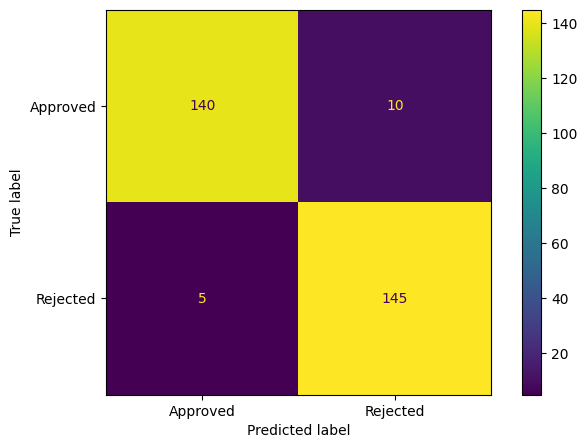

- Berdasarkan confussion metrix, kita dapat mengelompokkan pelanggan berdasarkan prediksi siapa yang mengklik iklan (145 pelanggan) dan siapa yang tidak mengklik iklan (155 pelanggan).

- Marketing cost = 145 customers X Rp 10.000 = Rp 1.450.000
- Conversion rate = 140/145 *100% = 96,55%
- Revenue = 140 customers X Rp 15.000 = Rp 2.100.000
- Profit = Revenue - Cost = Rp 650.000

Berdasarkan simulasi di atas, besarnya keuntungan sebesar Rp 650.000 dengan tingkat keuntungan 46,55%.

#Summary
Berdasarkan simulasi tersebut, dapat kami simpulkan bahwa:

- Jumlah biaya pemasaran yang diinvestasikan dalam simulasi tanpa ML lebih tinggi dan tidak memiliki target yang jelas karena kami mengeluarkan biaya tersebut untuk seluruh populasi. Hal ini akan menyebabkan penggunaan biaya pemasaran menjadi lebih tinggi dan tidak efisien serta potensi kerugian yang lebih besar tanpa adanya keuntungan dari pendapatannya.
- Jumlah biaya pemasaran yang diinvestasikan dalam simulasi penerapan model ML lebih rendah karena kami sudah memiliki prediksi pelanggan yang mengklik iklan dan yang tidak mengklik iklan di antara 500 pelanggan tersebut. Oleh karena itu kami akan fokus pada grup dengan pelanggan yang diperkirakan akan mengklik iklan. Hal ini akan mengurangi jumlah sasaran pemasaran namun juga meningkatkan efisiensi karena kita menginvestasikan biaya pemasaran pada populasi yang tepat. Hal ini menghasilkan tingkat konversi yang lebih tinggi hingga 96%. Kemudian kita dapat melihat model tersebut mampu meningkatkan tingkat keuntungan menjadi sekitar 46% dibandingkan simulasi sebelumnya tanpa penerapan model ML.
- Penerapan machine learning dalam memprediksi pelanggan iklan yang diklik sangat berguna dalam dunia industri karena akan mencegah bisnis mengalami potensi kerugian dan menghasilkan potensi keuntungan yang lebih tinggi.